# Results - ENEM dataset

Exam codes:

## CH - Humanities
## CN - Natural Sciences
## MT - Math


In [15]:
# jupyter nbconvert --no-input --to pdf enem-llm-irt-analysis.ipynb       
palette = ["red", "purple", "blue", "green"]

In [16]:
from read_functions import read_human_data
from read_functions import read_llm_data

dic_human_scores, dic_human_itens, dic_average_human_thetas_df = read_human_data()
dic_scores, dic_itens, dic_logs, dic_test_responses, dic_average_theta_by_ctt_score, dic_average_theta_by_ctt_random_score = read_llm_data()

C:\Users\pedro\Downloads\TRI\scripts\read_functions.py:40: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  human_mt_2022_thetas_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_humans/2022/thetas/thetas_humans_MT_2022.csv")
C:\Users\pedro\Downloads\TRI\scripts\read_functions.py:66: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  human_cn_2022_thetas_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_humans/2022/thetas/thetas_humans_CN_2022.csv")


Loading... CH 2020 mistral simple-zero-shot
Loading... CH 2021 mistral simple-zero-shot
Loading... CH 2022 mistral simple-zero-shot
Loading... MT 2020 mistral simple-zero-shot
Loading... MT 2021 mistral simple-zero-shot
Loading... MT 2022 mistral simple-zero-shot
Loading... CN 2022 mistral simple-zero-shot
Loading... CH 2020 llama2 simple-zero-shot
Loading... CH 2021 llama2 simple-zero-shot
Loading... CH 2022 llama2 simple-zero-shot


Since each exam is comprised of questions containing 5 options, if we shuffle all possible orders there are 5! = 120 different shuffles.
Due to resource contraints we may not have run all shuffles for all exams; the table below indicates how many shuffles we have run.


LLMs not always respond in a way we can parse the answer.
Let's keep track of the percentage of correct parsings.

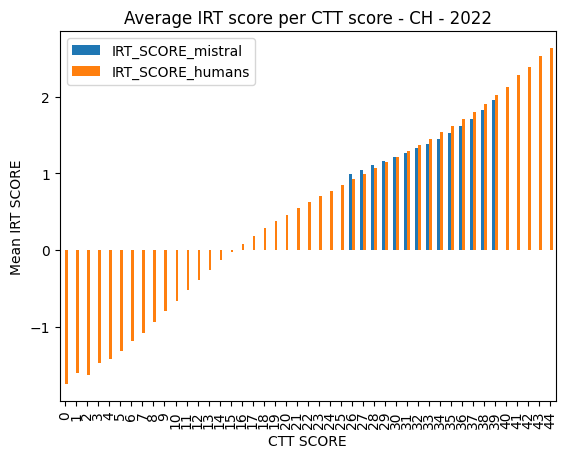

<Figure size 640x480 with 0 Axes>

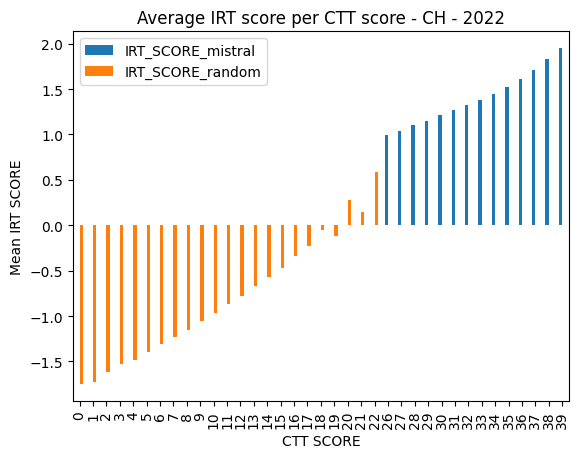

<Figure size 640x480 with 0 Axes>

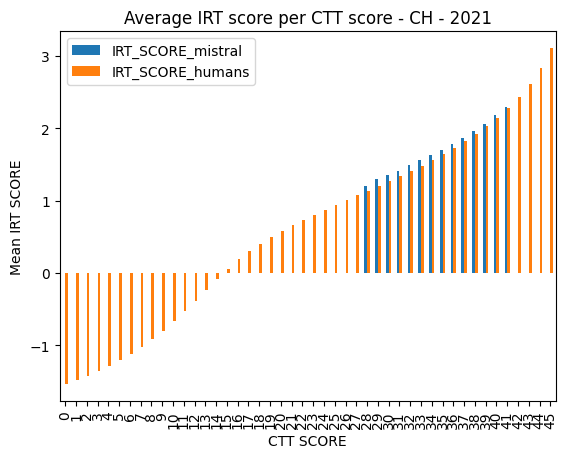

<Figure size 640x480 with 0 Axes>

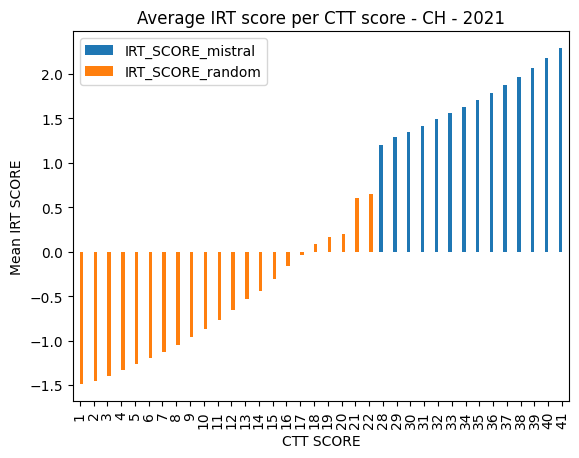

<Figure size 640x480 with 0 Axes>

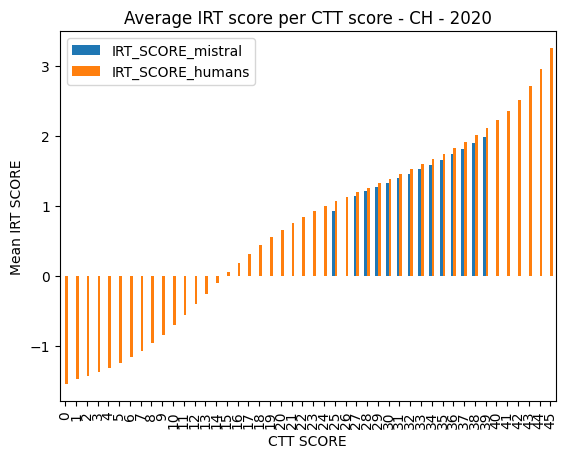

<Figure size 640x480 with 0 Axes>

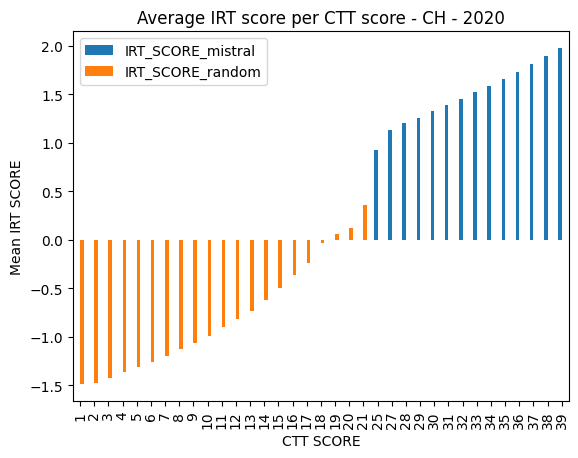

<Figure size 640x480 with 0 Axes>

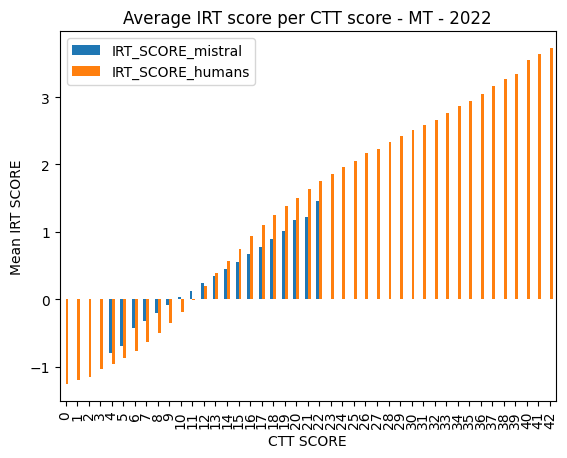

<Figure size 640x480 with 0 Axes>

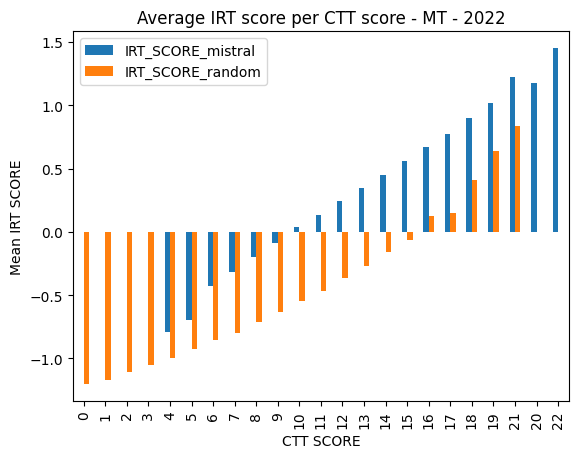

<Figure size 640x480 with 0 Axes>

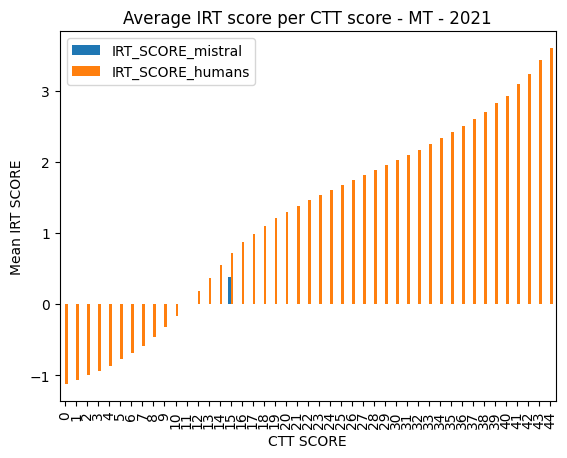

<Figure size 640x480 with 0 Axes>

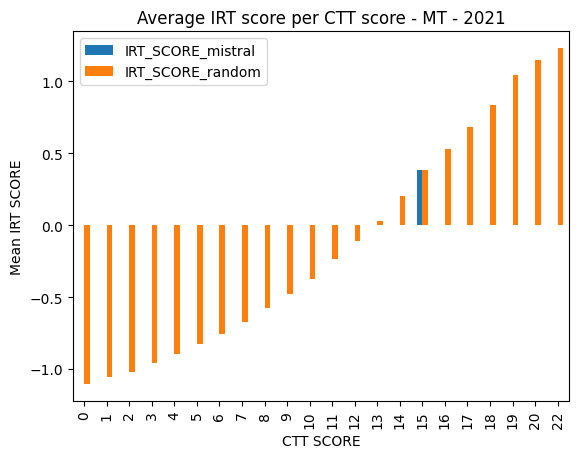

<Figure size 640x480 with 0 Axes>

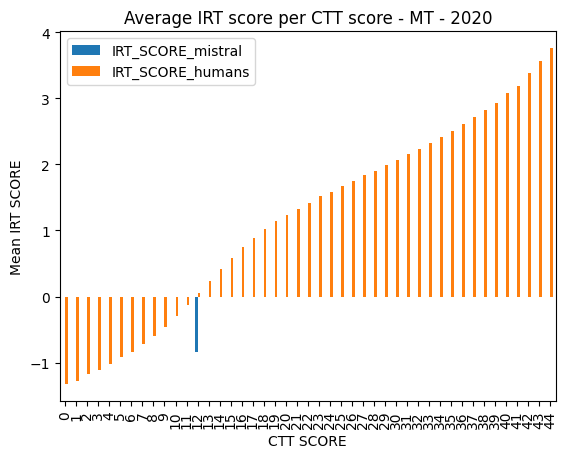

<Figure size 640x480 with 0 Axes>

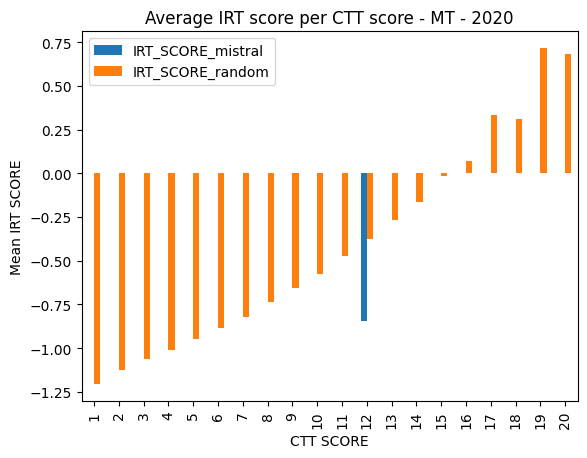

<Figure size 640x480 with 0 Axes>

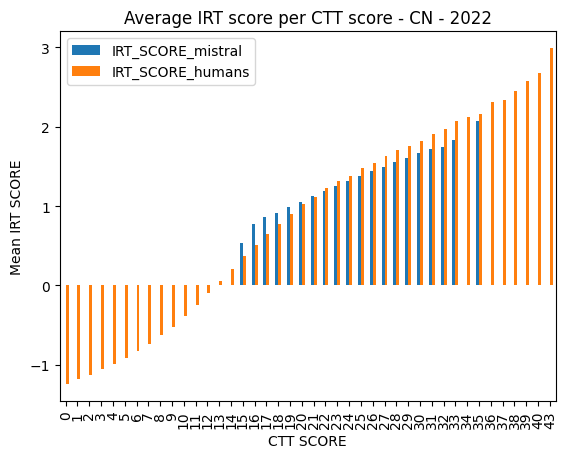

<Figure size 640x480 with 0 Axes>

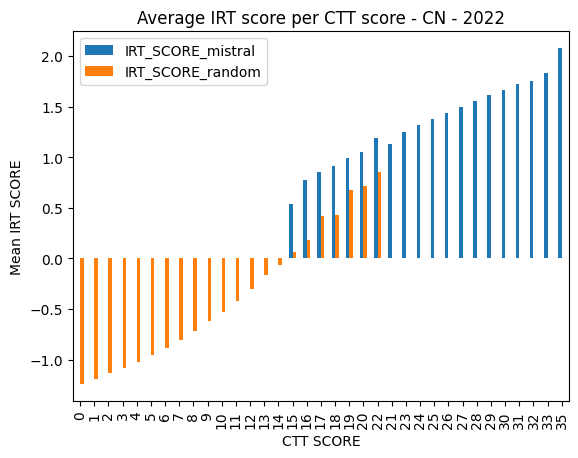

<Figure size 640x480 with 0 Axes>

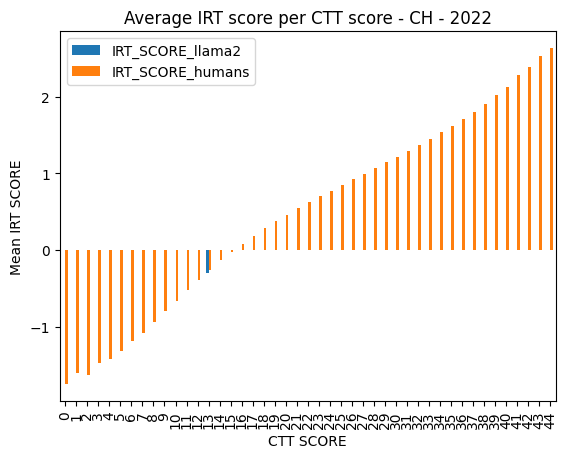

<Figure size 640x480 with 0 Axes>

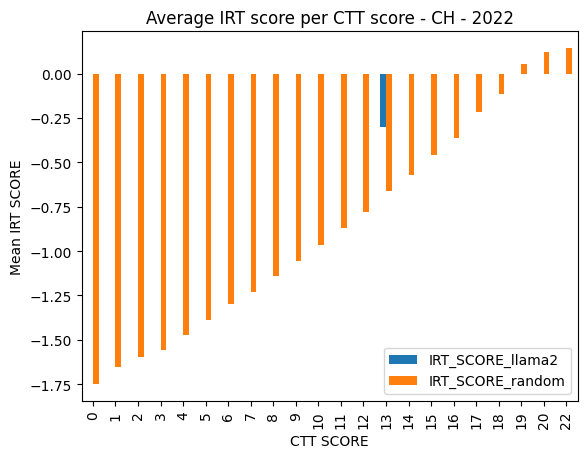

<Figure size 640x480 with 0 Axes>

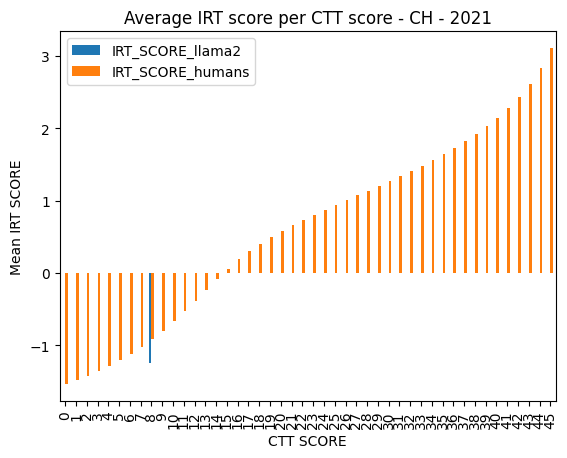

<Figure size 640x480 with 0 Axes>

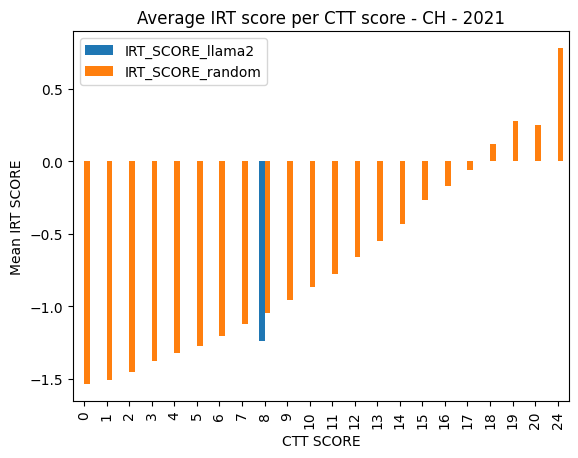

<Figure size 640x480 with 0 Axes>

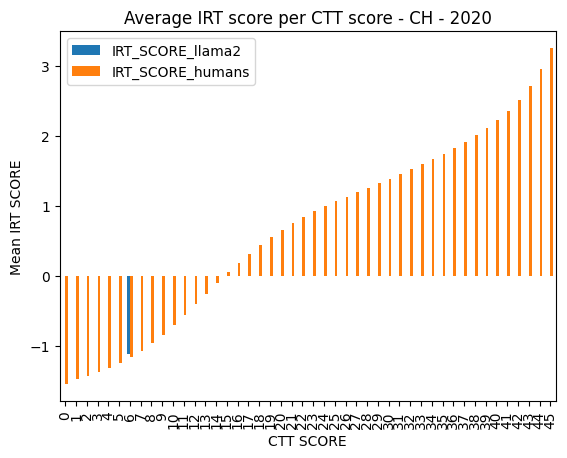

<Figure size 640x480 with 0 Axes>

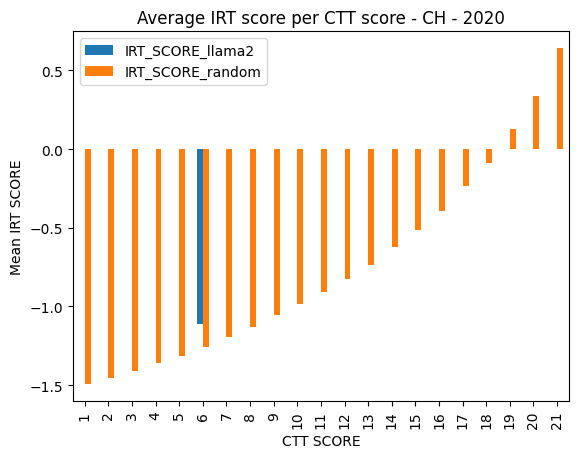

<Figure size 640x480 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

for llm in dic_scores.keys():
    for exam in dic_scores[llm].keys():
        for year in sorted(dic_scores[llm][exam].keys(),  reverse=True):
      
            merged_df = pd.merge(dic_average_human_thetas_df[exam][year], dic_average_theta_by_ctt_score[llm][exam][year], on='CTT_SCORE', how='outer',  suffixes=('_humans', '_'+llm))
            merged_df.plot(x='CTT_SCORE', y=['IRT_SCORE_'+llm, 'IRT_SCORE_humans'], kind='bar', legend=True)
            plt.xlabel('CTT SCORE')
            plt.ylabel('Mean IRT SCORE')
            plt.title(f'Average IRT score per CTT score - {exam} - {year}')
            plt.show()
            plt.savefig(f'figures/average-irt-score-{exam}-{year}.pdf', format='pdf',bbox_inches='tight')

            merged_df = pd.merge(dic_average_theta_by_ctt_random_score[llm][exam][year], dic_average_theta_by_ctt_score[llm][exam][year], on='CTT_SCORE', how='outer',  suffixes=('_random', '_'+llm))
            merged_df.plot(x='CTT_SCORE', y=['IRT_SCORE_'+llm, 'IRT_SCORE_random'], kind='bar', legend=True)
            plt.xlabel('CTT SCORE')
            plt.ylabel('Mean IRT SCORE')
            plt.title(f'Average IRT score per CTT score - {exam} - {year}')
            plt.show()
            plt.savefig(f'figures/average-irt-score-{exam}-{year}.pdf', format='pdf',bbox_inches='tight')





In [18]:
#for exam in ["CH", "CN", "MT"]:
#    for year in [2022, 2021, 2020]:
#        jp = sns.jointplot(data=dic_mistral_scores[exam][year], x="CTT_SCORE", y="IRT_SCORE", kind="hist")
#        jp.fig.suptitle(f"IRT vs ENEM score - HUMAN {exam} ({year})")

In [52]:
import pandas as pd

gabriel_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_llms/ZIPS/ALL/GABRIEL/experiments-with-irt.csv")
itens_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_humans/2022/itens/human_itens_MT_1082_2022.csv")

bs = itens_df['NU_PARAM_B'].tolist()

gabriel_df[gabriel_df["ENEM_EXAM"] == 'ENEM_2022_MT_CO_PROVA_1082'][['MODEL_NAME','MODEL_SIZE','CO_PROVA','RESPONSE_PATTERN','CTT_SCORE','IRT_SCORE']].sort_values(by='CTT_SCORE', ascending=False)


,MODEL_NAME,MODEL_SIZE,CO_PROVA,RESPONSE_PATTERN,CTT_SCORE,IRT_SCORE
6,gpt-3.5-turbo,NaN,1082,111110001010000000110100010011000000001000000,14,0.583685
7,gpt-3.5-turbo,NaN,1082,111111100010000000010100100001000001000000000,13,0.204648
22,llama2,7b,1082,000100001001011000001100010010001000011000001,13,-0.453485
14,llama2,13b,1082,000000000100000000001101111011100000010000001,12,-0.889187
23,llama2,7b,1082,001100001100011000000100000000001000010000001,10,-0.368546
15,llama2,13b,1082,000100001100000000000100000011000000010000001,8,-0.834266
31,mistral,7b,1082,100100001000000000001100000000100000000000000,6,-0.634205
30,mistral,7b,1082,000000000100000000000100000000001000010000000,4,-1.192549


In [ ]:
# gpt 111111100010000000010100100001000001000000000
# llama2 000100001001011000001100010010001000011000001


    

In [115]:
llama2_response_pattern = "000100001001011000001100010010001000011000001"
llama2_points = list(zip(llama2_response_pattern, bs))
llama2_points = sorted(llama2_points, key=lambda x: x[1])


print(llama2_points)

correct_llama2_points = [tup[1] for tup in llama2_points if tup[0] == '1']
incorrect_llama2_points = [tup[1] for tup in llama2_points if tup[0] == '0']
llama2_points = [tup[1] for tup in llama2_points] 

gpt_response_pattern = "111111100010000000010100100001000001000000000"
gpt_points = list(zip(gpt_response_pattern, bs))
gpt_points = sorted(gpt_points, key=lambda x: x[1])

print(gpt_points)

correct_gpt_points = [tup[1] for tup in gpt_points if tup[0] == '1']
incorrect_gpt_points = [tup[1] for tup in gpt_points if tup[0] == '0']
gpt_points = [tup[1] for tup in gpt_points] 





[('0', -0.02398), ('0', 0.46698), ('1', 0.63977), ('0', 0.64802), ('0', 0.87454), ('0', 0.94716), ('0', 1.32978), ('1', 1.38103), ('0', 1.56693), ('0', 1.58603), ('1', 1.6446), ('1', 1.88956), ('1', 1.92189), ('1', 2.02109), ('0', 2.0354), ('0', 2.16924), ('0', 2.2135), ('0', 2.2515), ('1', 2.27556), ('0', 2.301), ('0', 2.33341), ('1', 2.35816), ('0', 2.3731), ('1', 2.40384), ('0', 2.40899), ('0', 2.41531), ('1', 2.44795), ('0', 2.5423), ('0', 2.56697), ('0', 2.57768), ('0', 2.58401), ('0', 2.58862), ('0', 2.65319), ('0', 2.784), ('0', 2.86025), ('1', 3.22198), ('0', 3.30111), ('0', 3.33565), ('0', 3.73781), ('0', 4.65334), ('1', 6.27505), ('1', nan), ('0', nan), ('0', 4.48651), ('0', nan)]
[('1', -0.02398), ('1', 0.46698), ('0', 0.63977), ('1', 0.64802), ('1', 0.87454), ('1', 0.94716), ('0', 1.32978), ('0', 1.38103), ('0', 1.56693), ('0', 1.58603), ('0', 1.6446), ('0', 1.88956), ('0', 1.92189), ('0', 2.02109), ('0', 2.0354), ('0', 2.16924), ('0', 2.2135), ('0', 2.2515), ('0', 2.27556)

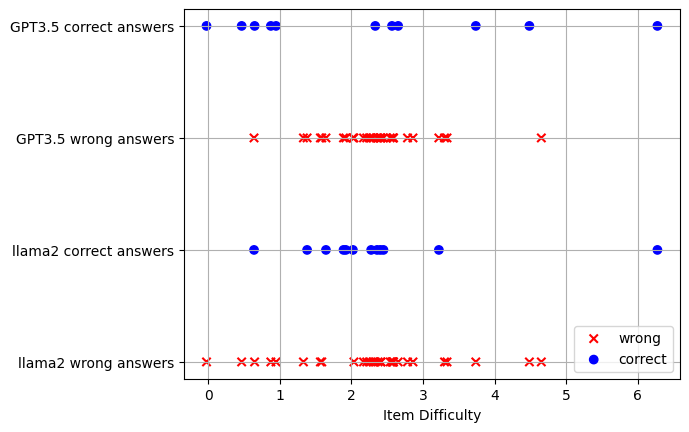

In [124]:
import matplotlib.pyplot as plt
import random

# Plot correct points
# Plot incorrect points
plt.scatter(incorrect_llama2_points, ['llama2 wrong answers'] * len(incorrect_llama2_points), color=['red'] * len(incorrect_llama2_points), marker='x', label='wrong')
plt.scatter(correct_llama2_points, ['llama2 correct answers'] * len(correct_llama2_points), color=['blue'] * len(correct_llama2_points), marker='o', label='correct')

plt.scatter(incorrect_gpt_points, ['GPT3.5 wrong answers'] * len(incorrect_gpt_points), color=['red'] * len(incorrect_gpt_points), marker='x')
plt.scatter(correct_gpt_points, ['GPT3.5 correct answers'] * len(correct_gpt_points), color=['blue'] * len(correct_gpt_points), marker='o',)

plt.savefig(f'figures/irt-analysis/irt-scores-gpt-llama.pdf', format='pdf',bbox_inches='tight')

#plt.xlim([2, 2.5])


# Customize plot
plt.xlabel('Item Difficulty')
#plt.ylabel('Categories')
#plt.title('Correct and Incorrect Data Points')
plt.legend()
plt.grid(True)
plt.show()
